In [12]:
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import combine_dataframe

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot
import numpy as np
import pickle


In [13]:
all_song_dataframe, features_dataframe, credentials_dataframe = combine_dataframe.get_combinedSongs()

In [14]:
all_song_dataframe

,setnumber,Title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1,Tek It,751srcHf5tUqcEa9pRCQwP,0.423,0.913,8,-5.354,1,0.0655,0.000065,0.0,0.269,0.596,146.995
1,2,RAVE,01kfSdF9zfcDLri5sSWEoL,0.716,0.748,8,-6.06,1,0.0356,0.235,0.849,0.114,0.338,119.918
2,3,As It Was,4LRPiXqCikLlN15c3yImP7,0.52,0.731,6,-5.338,0,0.0557,0.342,0.00101,0.311,0.662,173.93
3,4,10 Things I Hate About You,6Jkm5kUldvIqxzI1Pa7nXH,0.544,0.786,8,-2.97,1,0.0501,0.00991,0.0,0.169,0.446,153.967
4,5,Soy El Unico,6HJIZUOiZDE814XMhRGSZN,0.708,0.449,4,-4.369,0,0.0286,0.451,0.0,0.111,0.63,84.396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,6,No Church In The Wild,3Osd3Yf8K73aj4ySn6LrvK,0.654,0.75,8,-7.509,0,0.105,0.246,0.0178,0.167,0.557,92.78
6,7,Stronger,0j2T0R9dR9qdJYsB7ciXhf,0.617,0.717,10,-7.858,0,0.153,0.00564,0.0,0.408,0.49,103.992
7,8,Super Rich Kids,0725YWm6Z0TpZ6wrNk64Eb,0.739,0.419,3,-8.241,0,0.0854,0.219,0.0,0.196,0.58,60.493
8,9,"Let It Go - From ""Frozen""/Soundtrack Version",0qcr5FMsEO85NAQjrlDRKo,0.543,0.485,8,-6.85,1,0.0305,0.558,0.0,0.12,0.371,136.961


In [15]:
scaler = StandardScaler()
scaler.fit(features_dataframe)
audio_features_scaled = scaler.transform(features_dataframe)


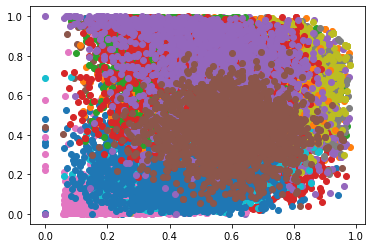

In [16]:
kmeans = KMeans(n_clusters=16, random_state=1234)
kmeans.fit(audio_features_scaled)
# assign a cluster to each example
labels = kmeans.predict(audio_features_scaled)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(features_dataframe.to_numpy()[row_ix, 0], features_dataframe.to_numpy()[row_ix,1])
    # show the plot
pyplot.show()

In [17]:
category_dataframe = pd.DataFrame(labels)
category_dataframe.columns = ['cluster']

In [18]:
search_data_dataframe = credentials_dataframe.join(category_dataframe)

Training a K-Means model with 300 clusters! 

Training a K-Means model with 301 clusters! 

Training a K-Means model with 302 clusters! 

Training a K-Means model with 303 clusters! 

Training a K-Means model with 304 clusters! 

Training a K-Means model with 305 clusters! 

Training a K-Means model with 306 clusters! 

Training a K-Means model with 307 clusters! 

Training a K-Means model with 308 clusters! 

Training a K-Means model with 309 clusters! 

Training a K-Means model with 310 clusters! 

Training a K-Means model with 311 clusters! 

Training a K-Means model with 312 clusters! 

Training a K-Means model with 313 clusters! 

Training a K-Means model with 314 clusters! 

Training a K-Means model with 315 clusters! 

Training a K-Means model with 316 clusters! 

Training a K-Means model with 317 clusters! 

Training a K-Means model with 318 clusters! 

Training a K-Means model with 319 clusters! 

Training a K-Means model with 320 clusters! 

Training a K-Means model with 321 

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

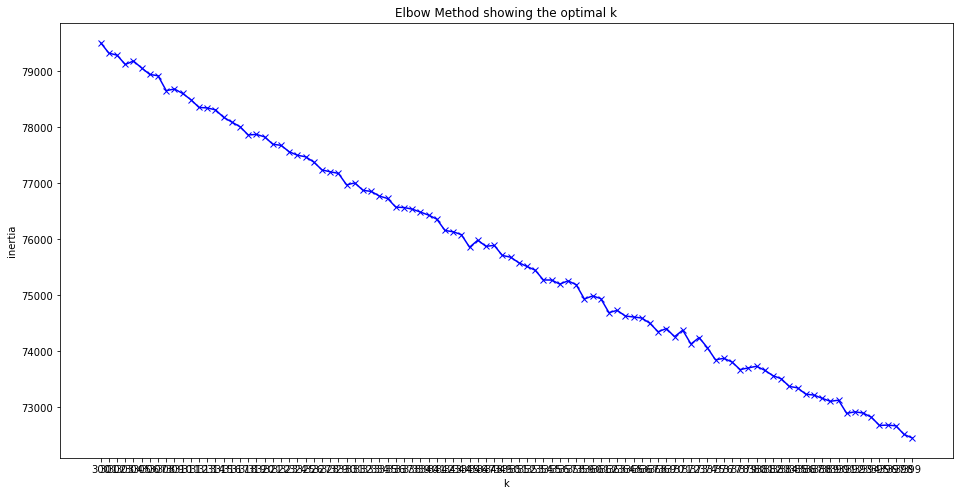

In [19]:
K = range(300, 400)
inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    max_iter=1000)
    kmeans.fit(audio_features_scaled)
    inertia.append(kmeans.inertia_)

    filename = "../models/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(audio_features_scaled, kmeans.predict(audio_features_scaled)))

    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

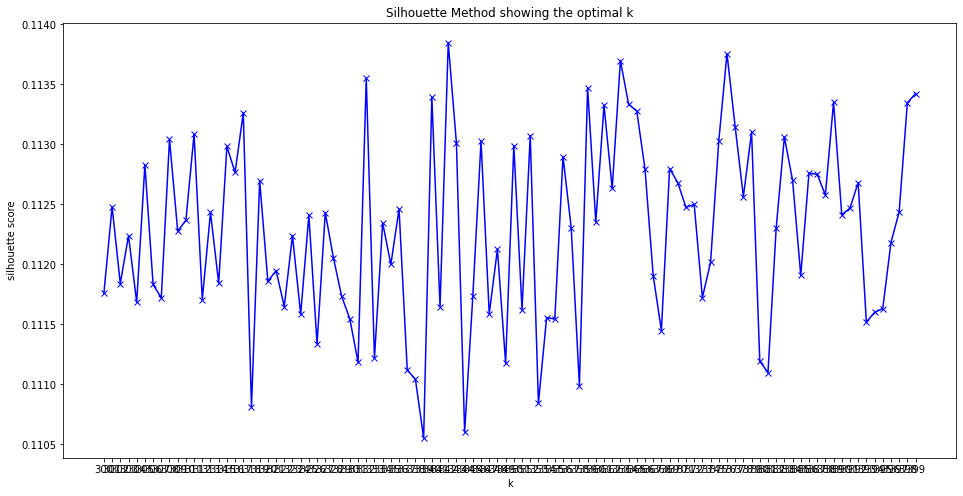

In [20]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [21]:
with open("../models/scaler.pickle", "wb") as the_new_file:
    pickle.dump(scaler,the_new_file)
#with open("../models/song_search_list_dataframe") as the_new_file:
#    pickle.dump(search_data_dataframe,the_new_file)